In [2]:
import sys
print('pythpn: {}'.format(sys.version))

pythpn: 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]


In [8]:
import scipy
print('scipy: {}'.format(scipy.__version__))

scipy: 1.6.0


In [9]:
import numpy
print('numpy: {}'.format(numpy.__version__))

numpy: 1.19.5


In [10]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 0.24.0


In [11]:
import pandas
print('pandas: {}'.format(pandas.__version__))

pandas: 1.2.0


In [12]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.3


In [63]:
# load libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [64]:
# load data using pandas
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-lenght', 'petal-width', 'class']
dataset= pd.read_csv(url, names=names)

In [65]:
print(dataset.shape)

(150, 5)


In [66]:
print(dataset.head(10))

   sepal-length  sepal-width  petal-lenght  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [67]:
print(dataset.describe())

       sepal-length  sepal-width  petal-lenght  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [68]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


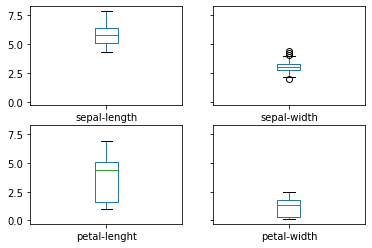

In [69]:
dataset.plot(kind='box', subplots= True, layout=(2,2), sharex=True, sharey= True)
plt.show()

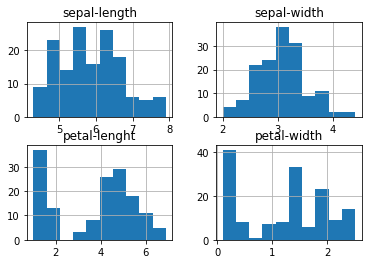

In [70]:
dataset.hist()
plt.show()

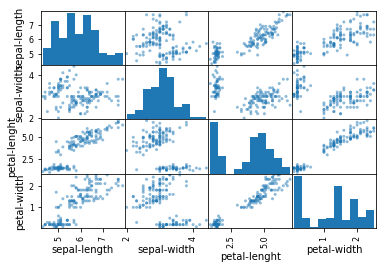

In [71]:
scatter_matrix(dataset)
plt.show()

In [72]:
array= dataset.values

In [73]:
array[0] 

array([5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], dtype=object)

In [74]:
X= array[:,0:4]
Y= array[:,4]
seed= 6
X_train, X_test, Y_train, Y_test= model_selection.train_test_split(X, Y, test_size=0.2, random_state=seed) 

In [75]:
scoring= 'accuracy'

In [84]:
models= [] 
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results= [] 
names= [] 

for name, model in models:
    kfold= model_selection.KFold(n_splits=10, shuffle=True,random_state=seed)
    cv_results=model_selection.cross_val_score(model, X_train,Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f  (%f)"%(name, cv_results.mean(), cv_results.std())
    print(msg)

/home/kamzon/anacondaaa/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kamzon/anacondaaa/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

LR: 0.958333  (0.041667)
LDA: 0.975000  (0.038188)
KNN: 0.958333  (0.041667)
CART: 0.941667  (0.053359)
NB: 0.966667  (0.040825)
SVM: 0.941667  (0.053359)
